#Exercise TDA 24 november

We want to find the homology barcode and the persistence diagram for the Vietoris-Rips filtration of the following point cloud in $\mathbb{R^2}$:

\begin{align*}
X=\lbrace (1,1),(1,2),(1,3),(2,1),(2,3),(3,1),(3,2),(3,3)\rbrace.
\end{align*}

We will use Ripser and Gudhi  python libraries to complete this exercise, thus, let us first install the necessary packages.

In [1]:
!pip install Cython
!pip install Ripser
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 635 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 4.2 MB/s 
  Created wheel for Ripser: filename=ripser-0.6.4-cp37-cp37m-linux_x86_64.whl size=457814 sha256=11f7598606cf8ab8a2929206545ef3d8798ce46f1510057c730ac39adcb935c4
  Stored in directory: /root/.cache/pip/wheels/62/fb/5a/a32dc69b86a4548cca943e467cdf256a94e9d9da649583ea78
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18119 sha256=9b23567498ab1f4c9e68bc6d0bd5e33a84860c35ed9fd35c47bddcc9cd98714d
  Stored in directory: /root/.cache/pip/wheels/d2/9f/a8/67f1b86e47cd17338d3d07939f4660378e65b758c4594f96e3
Successfully built Rip

First of all, let us import all the libraries we need.

In [21]:
import matplotlib.pyplot as plt
import gudhi
from ripser import ripser
from persim import plot_diagrams
import numpy as np

Now, let us define the point cloud $X$.

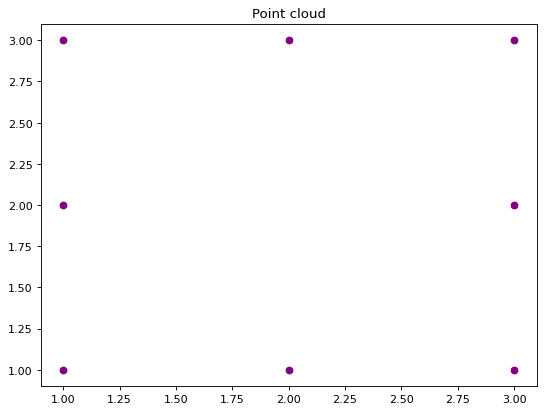

In [22]:
#Definition of the point cloud
data = np.zeros((8,2))
data[0,:]=[1,1]
data[1,:]=[1,2]
data[2,:]=[1,3]
data[3,:]=[2,1]
data[4,:]=[2,3]
data[5,:]=[3,1]
data[6,:]=[3,2]
data[7,:]=[3,3]
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Point cloud')
for i in range(0,8):
  plt.scatter(data[i,0],data[i,1],color='purple')
plt.show()

Let us draw the persistet homology barcode with gudhi.

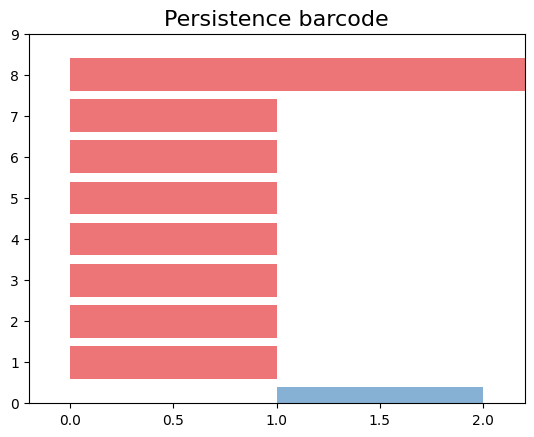

In [25]:
rips_complex = gudhi.RipsComplex(points=data, max_edge_length=5)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=5)
diag = simplex_tree.persistence(min_persistence=0.1)

gudhi.plot_persistence_barcode(diag)
plt.show()


Finally, let us draw the persistence diagram for the Vietoris-Rips filtration.

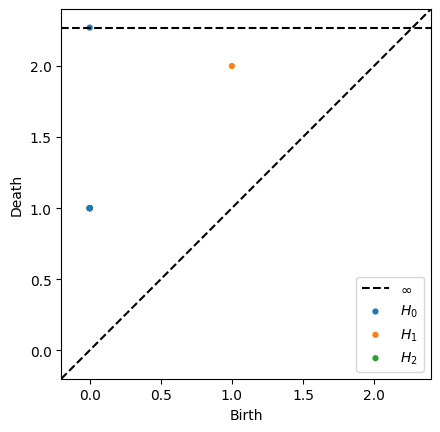

In [26]:
diagrams = ripser(data,maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)